[2.000e+00 3.000e+00 4.000e+00 ... 2.505e+03 2.506e+03 2.507e+03]


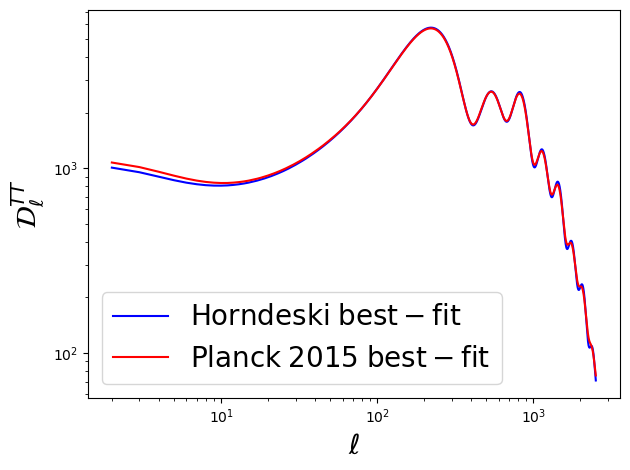

In [1]:
import numpy as np
from planck_lite_py import PlanckLitePy
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

# This should be the best fit data point, i.e. C_ells from hiclass evaluated at all ells:
# It should be given in a form ls*(ls+1)/(2*np.pi)*C_ells
ls, Dltt, Dlte, Dlee = np.genfromtxt('data/Dl_planck2015fit.dat', unpack=True)
cl_path = '/Users/matteograsso/Desktop/hiclass_and_class/hi_class_public_copy/output_planck/'
ls_mat, Dltt_mat, Dlee_mat, Dlte_mat, Dlbb_mat = np.genfromtxt(cl_path + 'cl.dat', unpack=True)
TCMB = 2.726

Dltt_save =np.copy(Dltt)
Dlte_save =np.copy(Dltt)
Dlee_save =np.copy(Dlee)

print(ls[:-1])

Dltt = Dltt_mat*1e12*TCMB**2
Dlte= Dlte_mat*1e12*TCMB**2
Dlee = Dlee_mat*1e12*TCMB**2


#ls_mat, Dltt_mat, Dlee_mat, Dlte_mat, Dlbb_mat = np.genfromtxt('01_cl_lensed.dat', unpack=True)

Dltt_mat = Dltt_mat*1e12*TCMB**2
Dlte_mat= Dlte_mat*1e12*TCMB**2
Dlee_mat = Dlee_mat*1e12*TCMB**2

ellmin=int(ls[0])

fontsi = 20
fontsi2 = 14

fig = plt.figure()
ax = fig.add_subplot()
#plt.rc('text', usetex=True)

plt.plot(ls,Dltt_mat, color = "blue", ls = "-", label = r"$\mathrm{Horndeski\;best-fit}$") 
plt.plot(ls,Dltt_save, color = "red", ls = "-", label = r"$\mathrm{Planck\;2015\;best-fit}$")

#plt.semilogx(ls,Dlte, color = "red", ls = "--")
#plt.semilogx(ls,Dlee, color = "black", ls = "--")

#plt.semilogx(ls_mat,Dltt_mat/Dltt[:len(Dltt_mat)]*1e12*2.74**2)

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\ell$", fontsize = fontsi)
plt.ylabel(r"$\mathcal{D}^{TT}_{\ell}$", fontsize = fontsi)
plt.legend(fontsize = fontsi)
plt.tight_layout()
plt.savefig("spectra.pdf")


planck2018=PlanckLitePy(data_directory='data', year=2018, spectra='TTTEEE', use_low_ell_bins=True)

In [2]:
planck2018=PlanckLitePy(data_directory='data', year=2018, spectra='TT', use_low_ell_bins=True)

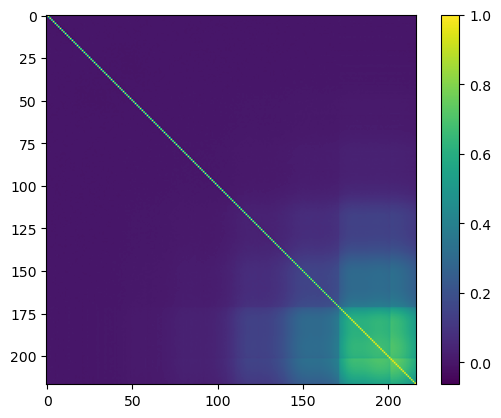

In [3]:
cov = np.linalg.inv(planck2018.fisher)
ell_tt, ell_te, ell_ee, combined, TT, TE, EE = planck2018.bin_model(Dltt, Dlte, Dlee)
ell_tt, ell_te, ell_ee, combined_save, TT_save, TE_save, EE_save = planck2018.bin_model(Dltt_save, Dlte_save, Dlee_save)


plt.imshow(cov/np.sqrt(np.diag(cov)[:,None]*np.diag(cov)[None, :] ))
plt.colorbar()

In [4]:
from scipy.stats import multivariate_normal

samples = np.random.multivariate_normal(TT,cov,size=10000)#switch TT to combine if TTTEEE
delta = samples - TT[None,:] #same here
chi2 = np.einsum('li,li->l',delta,np. einsum('ij,lj ->li', planck2018.fisher, delta))

In [5]:
planck2018=PlanckLitePy(data_directory='data', year=2018, spectra='TT', use_low_ell_bins=True)
delta = planck2018.X_data - TT
print(delta.shape)
end = -1
start = 0
chi2_data = np.dot(delta[start:end],np.dot(planck2018.fisher[start:end,start:end],delta[start:end]))
plt.hist(chi2,bins = 50,density=True)
print(chi2_data)
plt.axvline(x = chi2_data, color = 'red', label = 'Data')
print("p-value:", len(np.where(chi2 > chi2_data)[0])/len(chi2))

ValueError: operands could not be broadcast together with shapes (615,) (217,) 

In [ ]:

fontsi = 20
fontsi2 = 14


fig = plt.figure()
ax = fig.add_subplot()
plt.rc('text', usetex=True)

cov = np.linalg.inv(planck2018.fisher)
plt.semilogx(ell_tt,(TT -planck2018.X_data[:len(ell_tt)])/(TT), color = "blue", ls = "", marker = ".", label = r"$\mathrm{Horndeski\;} p= 0$")
plt.semilogx(ell_tt,(TT_save -planck2018.X_data[:len(ell_tt)])/(TT_save), color = "red", ls = "", marker = ".", label = r"$\mathrm{Planck\;best\;fit\;} p= 0.7$")

plt.fill_between(ell_tt, 2*np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT , -2*np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT ,color = "grey", alpha = .5)
plt.fill_between(ell_tt, np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT , -np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT ,color = "grey")
#plt.errorbar(ell_ee,(EE -planck2018.X_data[len(ell_tt) + len(ell_te): + len(ell_tt) + len(ell_ee) + len(ell_te)])/(EE), color = "black", ls = "--")
plt.xscale("linear")
plt.xlim(2,2500)
leg = plt.legend(fontsize=fontsi2,frameon = True)
leg.get_frame().set_edgecolor('black')

plt.ylim(-.2,.2)
plt.xlabel(r"$\ell$", fontsize = fontsi)
plt.ylabel(r"$\Delta \mathcal{D}^{TT}_{\ell}/\mathcal{D}^{TT}_{\ell}$", fontsize = fontsi)
plt.tick_params(labelsize=fontsi2)
plt.tight_layout()
plt.savefig("relative_residuals_TT.pdf")

In [23]:
planck2018=PlanckLitePy(data_directory='data', year=2018, spectra='EE', use_low_ell_bins=True)
delta = planck2018.X_data - combined
print(delta.shape)
end = -1
start = 0
chi2_data = np.dot(delta[start:end],np.dot(planck2018.fisher[start:end,start:end],delta[start:end]))
plt.hist(chi2,bins = 50,density=True)
print(chi2_data)
plt.axvline(x = chi2_data, color = 'red', label = 'Data')
print("p-value:", len(np.where(chi2 > chi2_data)[0])/len(chi2))


Spectra must be TT or TTTEEE


TypeError: __init__() should return None, not 'int'

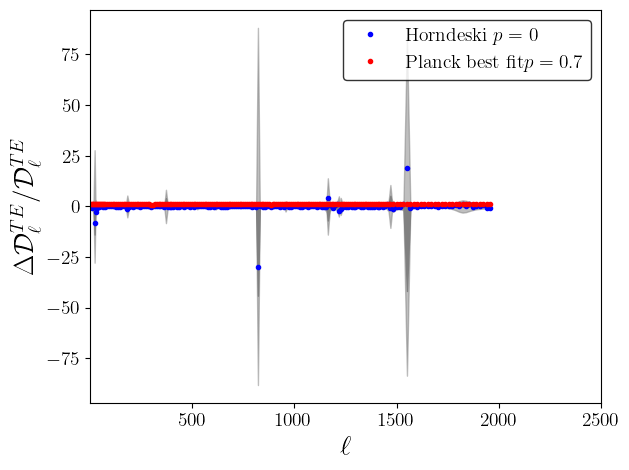

In [113]:

fontsi = 20
fontsi2 = 14


fig = plt.figure()
ax = fig.add_subplot()
plt.rc('text', usetex=True)

cov = np.linalg.inv(planck2018.fisher)
plt.semilogx(ell_te,(TE -planck2018.X_data[len(ell_tt): len(ell_tt) +len(ell_te)])/(TE), color = "blue", ls = "", marker = ".", label = r"$\mathrm{Horndeski\;} p= 0$")
plt.semilogx(ell_te,(TE_save -planck2018.X_data[len(ell_tt): len(ell_tt) +len(ell_te)])/(TE_save), color = "red", ls = "", marker = ".", label = r"$\mathrm{Planck\;best\;fit} p= 0.7$")

plt.fill_between(ell_te, 2*np.sqrt(np.diag(cov[len(ell_tt): len(ell_tt) +len(ell_te),len(ell_tt): len(ell_tt) +len(ell_te)]))/TE , -2*np.sqrt(np.diag(cov[len(ell_tt): len(ell_tt) +len(ell_te),len(ell_tt): len(ell_tt) +len(ell_te)]))/TE ,color = "grey", alpha = .5)
plt.fill_between(ell_te, np.sqrt(np.diag(cov[:len(ell_tt): len(ell_tt) +len(ell_te),len(ell_tt): len(ell_tt) +len(ell_te)]))/TE , -np.sqrt(np.diag(cov[len(ell_tt): len(ell_tt) +len(ell_te),len(ell_tt): len(ell_tt) +len(ell_te)]))/TE ,color = "grey")
#plt.errorbar(ell_ee,(EE -planck2018.X_data[len(ell_tt) + len(ell_te): + len(ell_tt) + len(ell_ee) + len(ell_te)])/(EE), color = "black", ls = "--")
plt.xscale("linear")
plt.xlim(2,2500)
leg = plt.legend(fontsize=fontsi2,frameon = True)
leg.get_frame().set_edgecolor('black')

#plt.ylim(-.2,.2)
plt.xlabel(r"$\ell$", fontsize = fontsi)
plt.ylabel(r"$\Delta \mathcal{D}^{TE}_{\ell}/\mathcal{D}^{TE}_{\ell}$", fontsize = fontsi)
plt.tick_params(labelsize=fontsi2)
plt.tight_layout()
plt.savefig("relative_residuals_TE.pdf")

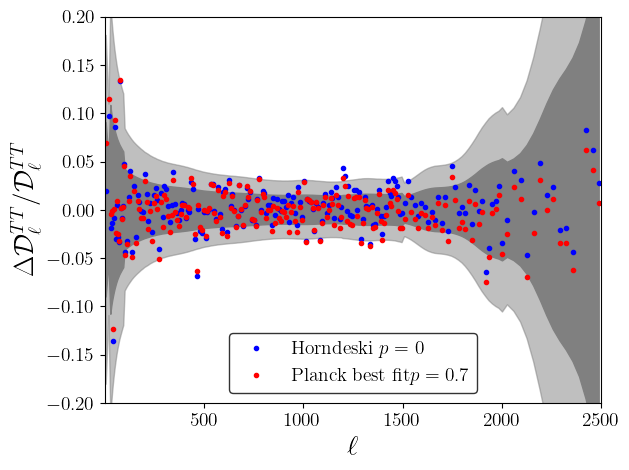

In [114]:

fontsi = 20
fontsi2 = 14


fig = plt.figure()
ax = fig.add_subplot()
plt.rc('text', usetex=True)

cov = np.linalg.inv(planck2018.fisher)
plt.semilogx(ell_tt,(TT -planck2018.X_data[:len(ell_tt)])/(TT), color = "blue", ls = "", marker = ".", label = r"$\mathrm{Horndeski\;} p= 0$")
plt.semilogx(ell_tt,(TT_save -planck2018.X_data[:len(ell_tt)])/(TT_save), color = "red", ls = "", marker = ".", label = r"$\mathrm{Planck\;best\;fit} p= 0.7$")

plt.fill_between(ell_tt, 2*np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT , -2*np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT ,color = "grey", alpha = .5)
plt.fill_between(ell_tt, np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT , -np.sqrt(np.diag(cov[:len(ell_tt),:len(ell_tt)]))/TT ,color = "grey")
#plt.errorbar(ell_ee,(EE -planck2018.X_data[len(ell_tt) + len(ell_te): + len(ell_tt) + len(ell_ee) + len(ell_te)])/(EE), color = "black", ls = "--")
plt.xscale("linear")
plt.xlim(2,2500)
leg = plt.legend(fontsize=fontsi2,frameon = True)
leg.get_frame().set_edgecolor('black')

plt.ylim(-.2,.2)
plt.xlabel(r"$\ell$", fontsize = fontsi)
plt.ylabel(r"$\Delta \mathcal{D}^{TT}_{\ell}/\mathcal{D}^{TT}_{\ell}$", fontsize = fontsi)
plt.tick_params(labelsize=fontsi2)
plt.tight_layout()
plt.savefig("relative_residuals_TT.pdf")